### Author - Vibuthi Seniya
### Reviewd by - Sahan Embogama
### Date - 10/04/2025

In [1]:
# importing the nessasary libaries and packages
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,root_mean_squared_error,r2_score,mean_absolute_error,mean_squared_error,RocCurveDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor,plot_tree
import matplotlib.pyplot as plt

Reused from code reuse session - 1

In [2]:
# read the csv file
db = pd.read_csv('/content/classified_data_final.csv')
db.head()

,Unnamed: 0,Patient_ID,Grade,A_Stage,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,0,A0012,3,1,4.0,24.0,1,60,0
1,1,A0013,2,1,35.0,14.0,5,62,0
2,2,A0014,2,1,63.0,14.0,7,75,0
3,3,A0015,3,1,18.0,2.0,1,84,0
4,4,A0016,3,1,41.0,3.0,1,50,0


Reused from code reuse session - 1

In [3]:
# categorize the data
X = db[['Survival_Months','Reginol_Node_Positive','Regional_Node_Examined','Tumor_Size']]
y = db['Mortality_Status']

In [4]:
X.shape

(4007, 4)

Reused From code reuse session - 1,2,3

In [5]:
#Split data into train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

Reused from code reuse sessoion - 2

In [6]:
#Training the model
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

Reused from code reuse session - 2

In [7]:
#Predicting
y_pred_LR = LR.predict(X_test)

In [8]:
# Printing the classification report
print('classification report for LR')
print(classification_report(y_test,y_pred_LR))

classification report for LR
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       679
           1       0.81      0.42      0.56       123

    accuracy                           0.90       802
   macro avg       0.86      0.70      0.75       802
weighted avg       0.89      0.90      0.88       802



Reused from code reuse session - 2

Confusion matrix for LR


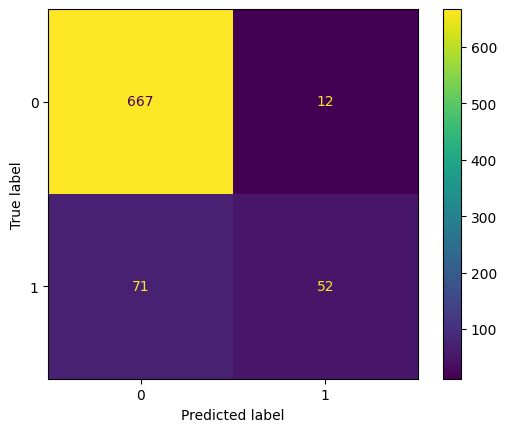

In [9]:
print('Confusion matrix for LR')
LR_cm = confusion_matrix(y_test,y_pred_LR)
dis = ConfusionMatrixDisplay(LR_cm,display_labels=LR.classes_)
dis.plot()

In [10]:
#Trining the naive bayes
NB = BernoulliNB()
NB.fit(X_train,y_train)

BernoulliNB()

In [11]:
y_pred_NB = NB.predict(X_test)

In [12]:
print('classification report for NB')
print(classification_report(y_test,y_pred_NB))

classification report for NB
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       679
           1       0.00      0.00      0.00       123

    accuracy                           0.85       802
   macro avg       0.42      0.50      0.46       802
weighted avg       0.72      0.85      0.78       802



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion matrix for NB


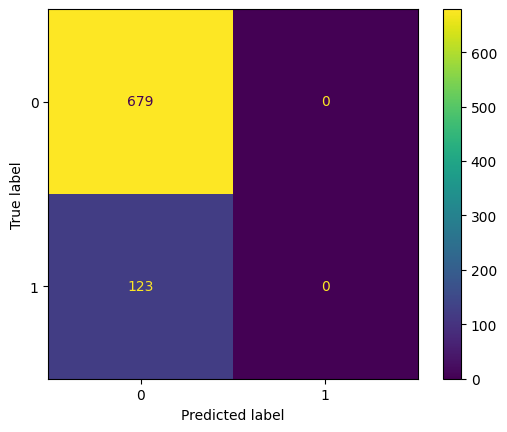

In [13]:
print('Confusion matrix for NB')
NB_cm = confusion_matrix(y_test,y_pred_NB)
dis = ConfusionMatrixDisplay(NB_cm,display_labels=NB.classes_)
dis.plot()

In [14]:
#Training the KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred_KNN = KNN.predict(X_test)

In [16]:
print('classification report for KNN')
print(classification_report(y_test,y_pred_KNN))

classification report for KNN
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       679
           1       0.77      0.49      0.60       123

    accuracy                           0.90       802
   macro avg       0.84      0.73      0.77       802
weighted avg       0.89      0.90      0.89       802



Confusion matrix for KNN


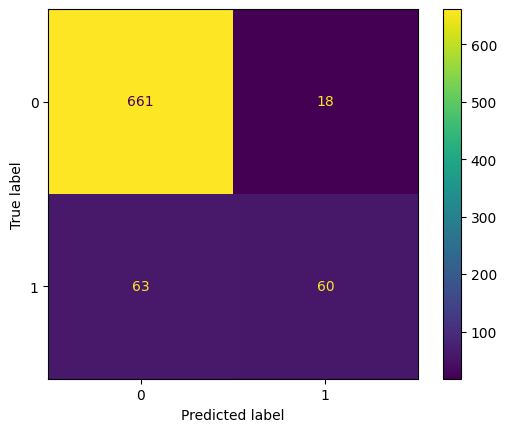

In [17]:
print('Confusion matrix for KNN')
KNN_cm = confusion_matrix(y_test,y_pred_KNN)
dis = ConfusionMatrixDisplay(KNN_cm,display_labels=KNN.classes_)
dis.plot()

In [18]:
#Traning the Ensemble learners
base_Learners = [('LR',LR),('NB',NB),('KNN',KNN)]
ensemble_learner = VotingClassifier(base_Learners,voting='hard')
ensemble_learner = ensemble_learner.fit(X_train,y_train)
y_pred_ensemble_learner = ensemble_learner.predict(X_test)

classification Report for Ensembler
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       679
           1       0.90      0.38      0.54       123

    accuracy                           0.90       802
   macro avg       0.90      0.69      0.74       802
weighted avg       0.90      0.90      0.88       802

Confusion matrix for Ensembler


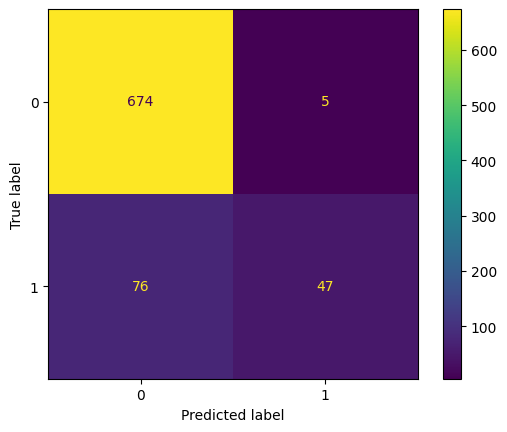

In [19]:
print('classification Report for Ensembler')
print(classification_report(y_test,y_pred_ensemble_learner))

print('Confusion matrix for Ensembler')
ensemble_learner_cm = confusion_matrix(y_test,y_pred_ensemble_learner)
dis = ConfusionMatrixDisplay(ensemble_learner_cm,display_labels=ensemble_learner.classes_)
dis.plot()

# Survival Month Prediction using Descision trees

In [20]:
tree_base = pd.read_csv('/content/regression_data.csv')
tree_base.head()

,Unnamed: 0,Grade,A_Stage,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,0,1.330233,0.15244,-1.253904,1.182628,-0.617568,-0.450350,-0.425804
1,1,-0.238408,0.15244,0.222514,-0.046566,0.164604,-0.371560,-0.425804
2,2,-0.238408,0.15244,1.556053,-0.046566,0.555689,0.140570,-0.425804
3,3,1.330233,0.15244,-0.587134,-1.521600,-0.617568,0.495122,-0.425804
4,4,1.330233,0.15244,0.508272,-1.398680,-0.617568,-0.844296,-0.425804


In [21]:
Xt = tree_base[['Grade','A_Stage','Tumor_Size','Regional_Node_Examined','Reginol_Node_Positive','Mortality_Status']]
yt = tree_base['Survival_Months']

In [22]:
#splitting the data to train test
Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size=0.2,random_state=42)

Reused from week 6 tutorial - page 19,20

In [23]:
#Training the DT
tree = DecisionTreeRegressor()
tree.fit(Xt_train,yt_train)

DecisionTreeRegressor()

In [24]:
y_pred_tree = tree.predict(Xt_test)

In [25]:
print("The full Regression Decision Tree Levels: ", tree.tree_.max_depth)

The full Regression Decision Tree Levels:  33


Reused from week 6 tutorial - page 19,20

In [36]:
#pruneing with dept 4
prune_tree = DecisionTreeRegressor(max_depth=4)
prune_tree.fit(Xt_train,yt_train)

DecisionTreeRegressor(max_depth=4)

Reused from week 6 tutorial - page 19

In [37]:
y_pred_tree_prune = prune_tree.predict(Xt_test)

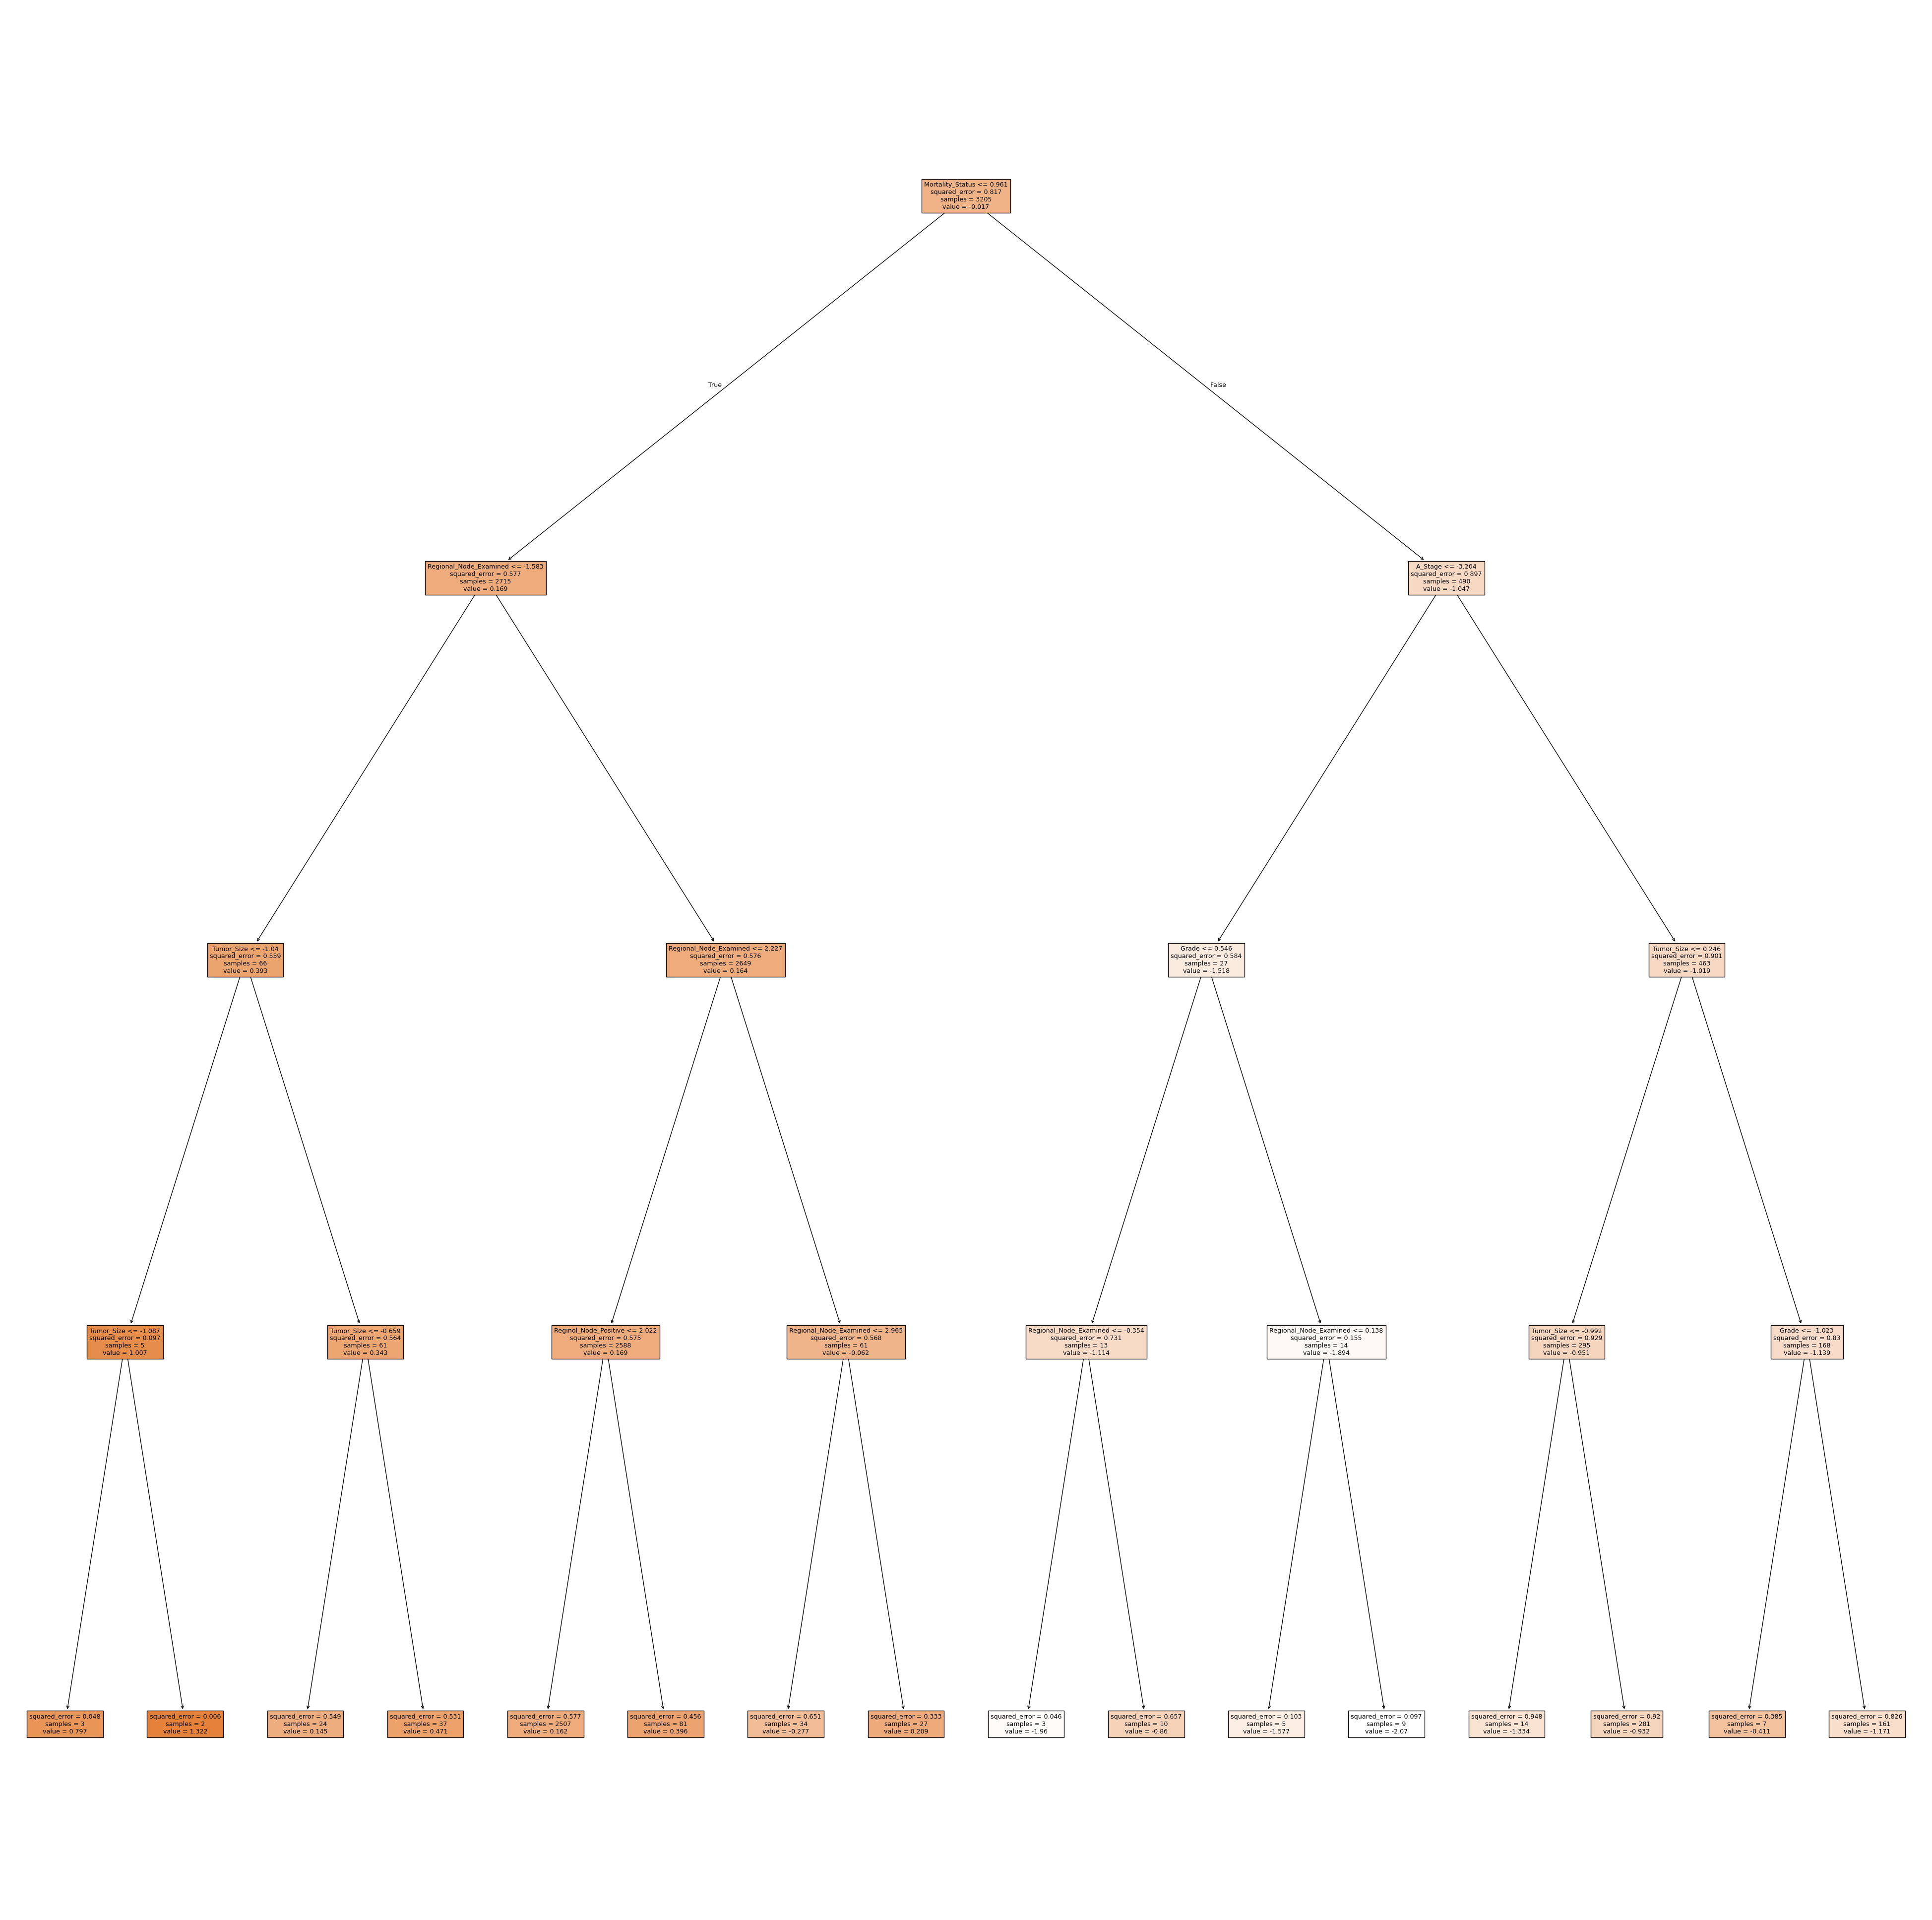

In [38]:
pruned_Tree_Model = plt.figure(figsize=(50,50))
pruned_Tree_Model_Graph = plot_tree(prune_tree,feature_names=list(Xt_train.columns),filled=True)
plt.show()




Reused from Tutorial week 6

In [39]:
# Evaluation for DT1(unpruned)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yt_test, y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(yt_test, y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yt_test, y_pred_tree)))
print('R2:', metrics.r2_score(yt_test, y_pred_tree))

Mean Absolute Error: 0.9278776694557512
Mean Squared Error: 2.211643137327213
Root Mean Squared Error: 1.4871594189350426
R2: -0.28272297149646475


In [40]:
# Evaluation for DT2(pruned)
print('Mean Absolute Error:', metrics.mean_absolute_error(yt_test, y_pred_tree_prune))
print('Mean Squared Error:', metrics.mean_squared_error(yt_test, y_pred_tree_prune))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yt_test, y_pred_tree_prune)))
print('R2:', metrics.r2_score(yt_test,y_pred_tree_prune))

Mean Absolute Error: 0.7030166813845
Mean Squared Error: 1.5670198330187517
Root Mean Squared Error: 1.25180662764612
R2: 0.09114978692590059


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

new_data = pd.DataFrame({
    'Grade': [2],
    'A_Stage': [1],
    'Tumor_Size': [41],
    'Regional_Node_Examined': [5],
    'Reginol_Node_Positive': [1],
    'Mortality_Status': [1]
})



data = scaler.fit_transform(new_data)
new_prediction = prune_tree.predict(data)
print(new_prediction)

[0.16167393]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
